In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


weather = pd.read_csv('Unit06 weatherAUS.csv')

In [15]:
le = LabelEncoder()
weather['RainToday'] = le.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = le.fit_transform(weather['RainTomorrow'])

In [16]:
weather.fillna(method = 'ffill', inplace = True)

In [17]:
x = weather.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

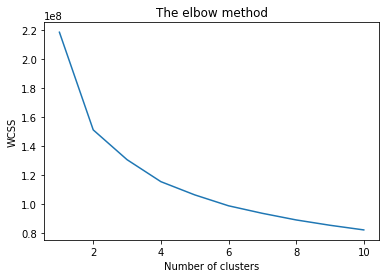

In [18]:
#elbow curve to find optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

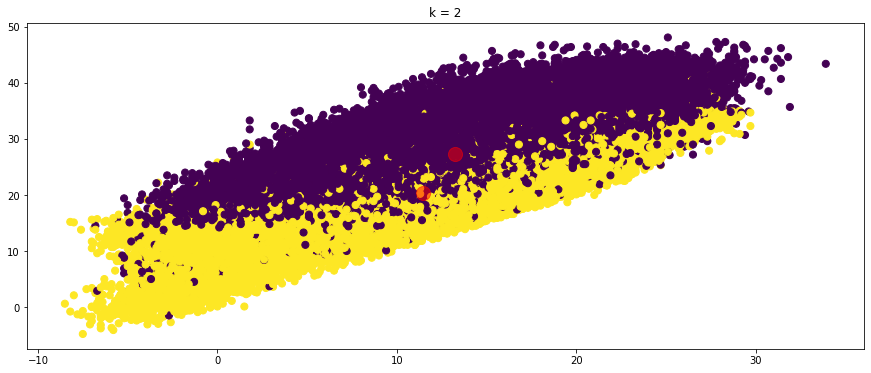

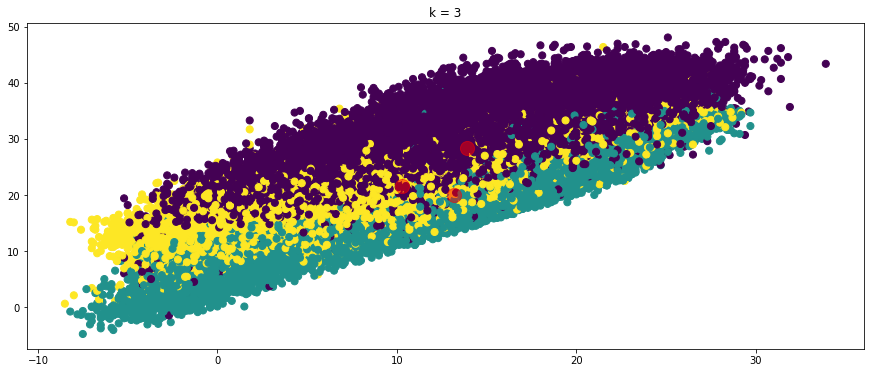

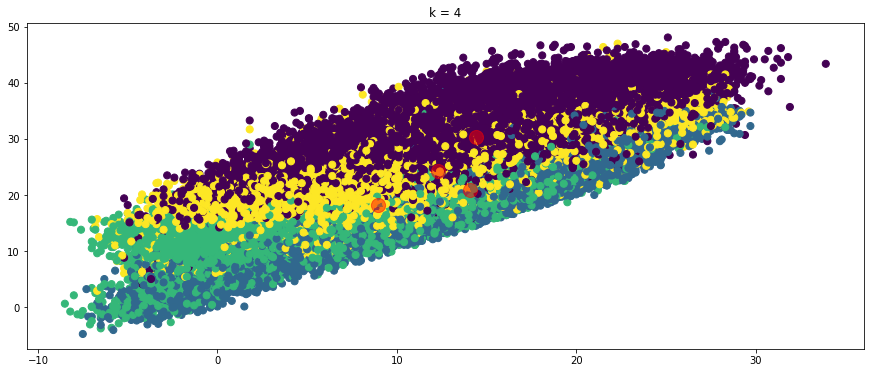

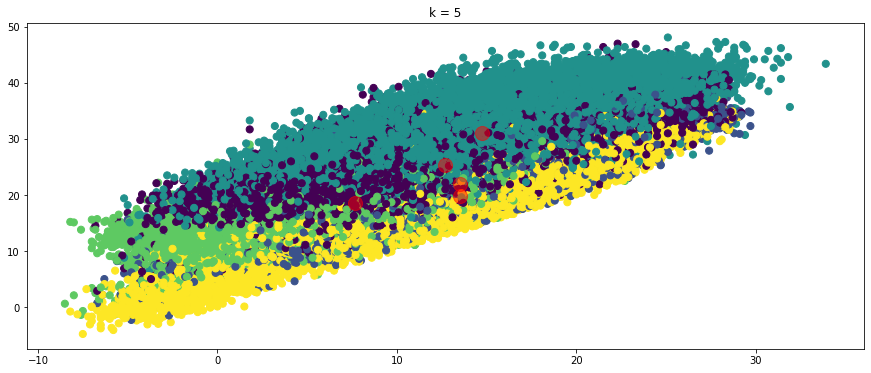

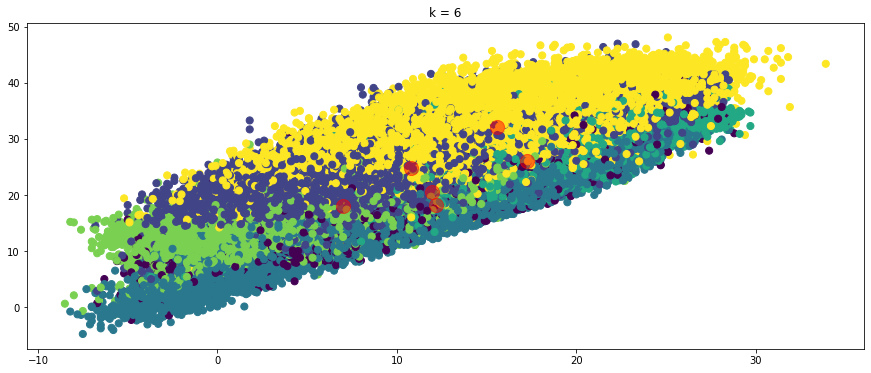

In [21]:
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i, n_init = 10, init = 'k-means++', random_state = 0)
    kmeans.fit(weather)
    y_kmeans = kmeans.predict(weather)
    
    plt.figure(figsize=(15, 6))
    plt.scatter(weather.iloc[:, 0], weather.iloc[:, 1], c = y_kmeans, s = 50)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha=0.5);
    plt.title('k = ' + str(i))
    plt.show()